# Utilities 

In [15]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import scipy
import random


# Graph Creation 

## Full Graph 

In [95]:
df = pd.read_csv('data/twitter_graph_location.csv') #Reads in the .csv file

df = df.drop(columns=['Unnamed: 0'])

G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted') #Creates the graph 


#Need to add in node attributes from dataframe 

# node_colors = {'Male': 'blue', 'Female': 'red'}
# df_nodes['node_color'] = df_nodes['Gender'].map(node_colors)

author_id = df['author_id'].values.tolist()

like_count = df['like_count'].values.tolist()

reply_count= df['reply_count'].values.tolist()

retweet_count= df['retweet_count'].values.tolist()

followers_count= df['followers_count'].values.tolist()

following_count= df['following_count'].values.tolist()

listed_count = df['listed_count'].values.tolist()

tweet_count= df['tweet_count'].values.tolist()

sentiment= df['sentiment'].values.tolist()

quote_count = df['quote_count'].values.tolist()

nodes = pd.DataFrame({'node' : author_id,
                      'like_count' : like_count,
                      'reply_count' : reply_count,
                      'retweet_count' : retweet_count,
                      'followers_count' :followers_count,
                      'following_count' : following_count,
                      'listed_count' : listed_count,
                      'tweet_count' : tweet_count,
                      'sentiment' : sentiment,
                      'quote_count' :quote_count })


nx.set_node_attributes(G, pd.Series(nodes.like_count, index=nodes.node).to_dict(), 'like_count')

nx.set_node_attributes(G, pd.Series(nodes.reply_count, index=nodes.node).to_dict(), 'reply_count')

nx.set_node_attributes(G, pd.Series(nodes.retweet_count, index=nodes.node).to_dict(), 'retweet_count')

nx.set_node_attributes(G, pd.Series(nodes.followers_count, index=nodes.node).to_dict(), 'followers_count')

nx.set_node_attributes(G, pd.Series(nodes.following_count, index=nodes.node).to_dict(), 'following_count')

nx.set_node_attributes(G, pd.Series(nodes.listed_count, index=nodes.node).to_dict(), 'listed_count')

nx.set_node_attributes(G, pd.Series(nodes.tweet_count, index=nodes.node).to_dict(), 'tweet_count')

nx.set_node_attributes(G, pd.Series(nodes.sentiment, index=nodes.node).to_dict(), 'sentiment')

nx.set_node_attributes(G, pd.Series(nodes.quote_count, index=nodes.node).to_dict(), 'quote_count')





## Subgraph 

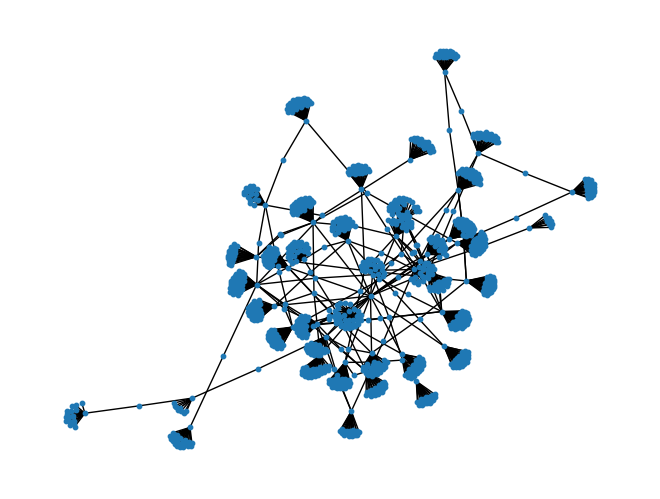

In [32]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
G_Sub = create_subgraph(G,1326702923611574272)


nx.draw(G_Sub, node_size=10)


## Largest Connected Component

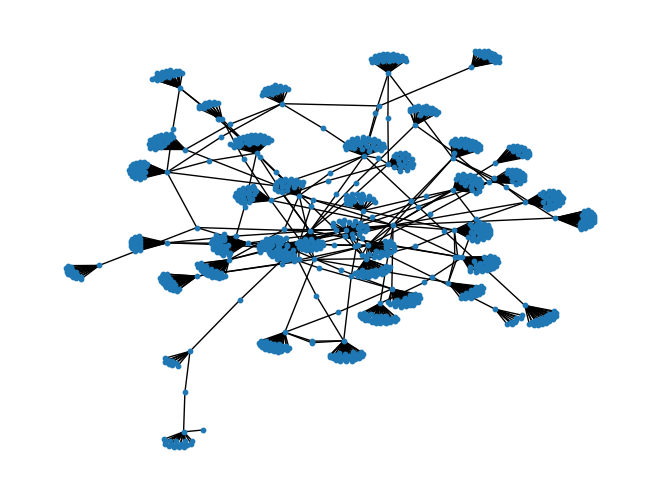

In [31]:
G_Conn = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (_, val) in G_Conn.degree()]

G_Conn.number_of_nodes()#/3500 *100

nx.draw(G_Conn, node_size=10)


## Random Sample

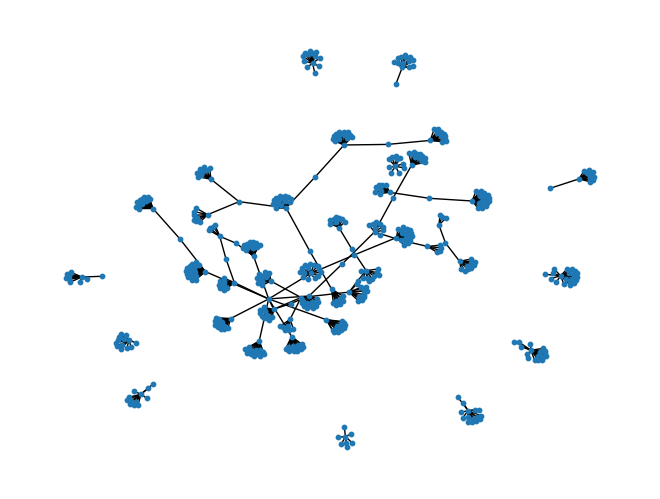

In [30]:
random_sample_edges = random.sample(list(G_Conn.edges), 500)
G_Rand = nx.Graph()
G_Rand.add_edges_from(random_sample_edges)

nx.draw(G_Rand, node_size=10)

# Analysis